In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_List
from utils.fileUtils import *
from utils.xsecUtils import *
from utils.plotter import Hist, Hist2d, easy_bins, x_from_bins
from utils.useCMSstyle import *
from utils.cutConfig import jet_btagWP

tight_b = jet_btagWP[1]
medium_b = jet_btagWP[2]
loose_b = jet_btagWP[3]

In [3]:
import awkward as ak
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import uproot
import vector

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-3,3)

In [5]:
pt_bins = easy_bins['pt']
eta_bins = easy_bins['eta']
phi_bins = easy_bins['phi']
score_bins = easy_bins['score']
mH_bins = easy_bins['mH']
x = x_from_bins(score_bins)

In [33]:
list_of_files = [f"root://cmseos.fnal.gov//store/group/lpchbb/private_nano/XYH_YToHH/CRAB_PrivateMC/lcadamur_NMSSM_XYH_YToHH_6b_MX_700_MY_400_sl6_nano_100k/201017_125832/0000/nanoAOD_step_{var}.root:Events" for var in range(1,10)]

In [ ]:
prefix_6b = ['gen_HX_b1', 'gen_HY1_b1', 'gen_HY2_b1', 'gen_HX_b2', 'gen_HY1_b2', 'gen_HY2_b2']

In [35]:
list_of_branches = [parton + '_pt' for parton in prefix_6b]

In [6]:
signal_tree = Tree(NMSSM_List[5])

In [7]:
def pt_bins(upper, n=100):
    return np.linspace(0,upper,n)

In [9]:
prefix_6b[0].split('_')

['gen', 'HX', 'b1']

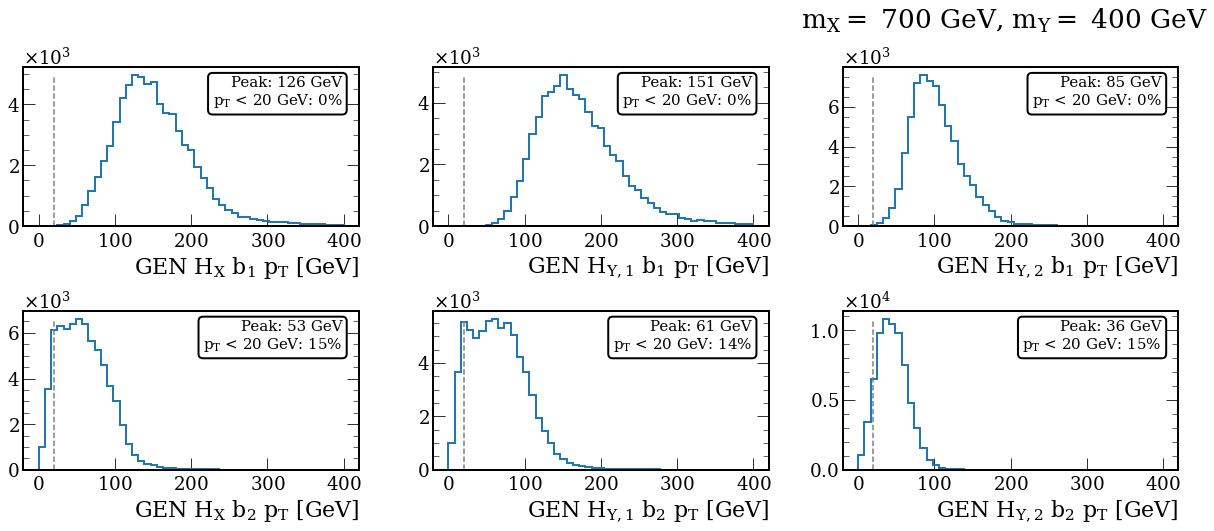

In [52]:
bins = np.linspace(0,400,50)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17,8))

fig.suptitle(signal_tree.sample, x=1, y=0.89, ha='right', va='bottom')

for ax, parton in zip(axs.flatten(), prefix_6b):
    particle_type, higgs, quark = parton.split('_')
    particle_type = particle_type.upper()
    try: higgs = '$' + higgs[0] + '_{' + higgs[1] + ',' + higgs[2] + '}$'
    except: higgs = '$' + higgs[0] + '_' + higgs[1] + '$'
    quark = '$' + quark[0] + '_' + quark[1] + '$'

    n, edges, x = Hist(signal_tree.get(parton + '_pt'), bins=bins, ax=ax, centers=True)
    ax.plot([20,20],[0,n.max()], '--', color='grey')
    ax.set_xlabel(rf'{particle_type} {higgs} {quark} $p_T$ [GeV]')
    
    fail_rate = n[edges[:-1] < 20].sum()/n.sum()*100

    bbox_prop = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
    ax.text(0.95, 0.95,
    f"Peak: {int(x[np.argmax(n)])} GeV\n$p_T$ < 20 GeV: {int(fail_rate)}%", 
    ha="right", va="top", transform=ax.transAxes, size=15, bbox=bbox_prop)

plt.tight_layout(h_pad=0.5)

In [127]:
eff_HX_b1_ptR  = ak.sum(signal_tree.gen_HX_b1_recojet_ptRegressed > 20)/len(signal_tree.gen_HX_b1_recojet_ptRegressed)
eff_HX_b2_ptR  = ak.sum(signal_tree.gen_HX_b2_recojet_ptRegressed > 20)/len(signal_tree.gen_HX_b2_recojet_ptRegressed)
eff_HY1_b1_ptR = ak.sum(signal_tree.gen_HY1_b1_recojet_ptRegressed > 20)/len(signal_tree.gen_HY1_b1_recojet_ptRegressed)
eff_HY1_b2_ptR = ak.sum(signal_tree.gen_HY1_b2_recojet_ptRegressed > 20)/len(signal_tree.gen_HY1_b2_recojet_ptRegressed)
eff_HY2_b1_ptR = ak.sum(signal_tree.gen_HY2_b1_recojet_ptRegressed > 20)/len(signal_tree.gen_HY2_b1_recojet_ptRegressed)
eff_HY2_b2_ptR = ak.sum(signal_tree.gen_HY2_b2_recojet_ptRegressed > 20)/len(signal_tree.gen_HY2_b2_recojet_ptRegressed)

sum_all_ptR = ak.sum((signal_tree.gen_HX_b1_recojet_ptRegressed > 20) & (signal_tree.gen_HX_b2_recojet_ptRegressed > 20) &(signal_tree.gen_HY1_b1_recojet_ptRegressed > 20) & (signal_tree.gen_HY1_b2_recojet_ptRegressed > 20) & (signal_tree.gen_HY2_b1_recojet_ptRegressed > 20) & (signal_tree.gen_HY2_b2_recojet_ptRegressed > 20))
eff_all_ptR = sum_all_ptR/len(signal_tree.gen_HX_b1_recojet_ptRegressed)


In [128]:
eff_HX_b1_pt  = ak.sum(signal_tree.gen_HX_b1_recojet_pt > 20)/len(signal_tree.gen_HX_b1_recojet_pt)
eff_HX_b2_pt  = ak.sum(signal_tree.gen_HX_b2_recojet_pt > 20)/len(signal_tree.gen_HX_b2_recojet_pt)
eff_HY1_b1_pt = ak.sum(signal_tree.gen_HY1_b1_recojet_pt > 20)/len(signal_tree.gen_HY1_b1_recojet_pt)
eff_HY1_b2_pt = ak.sum(signal_tree.gen_HY1_b2_recojet_pt > 20)/len(signal_tree.gen_HY1_b2_recojet_pt)
eff_HY2_b1_pt = ak.sum(signal_tree.gen_HY2_b1_recojet_pt > 20)/len(signal_tree.gen_HY2_b1_recojet_pt)
eff_HY2_b2_pt = ak.sum(signal_tree.gen_HY2_b2_recojet_pt > 20)/len(signal_tree.gen_HY2_b2_recojet_pt)

sum_all_pt = ak.sum((signal_tree.gen_HX_b1_recojet_pt > 20) & (signal_tree.gen_HX_b2_recojet_pt > 20) &(signal_tree.gen_HY1_b1_recojet_pt > 20) & (signal_tree.gen_HY1_b2_recojet_pt > 20) & (signal_tree.gen_HY2_b1_recojet_pt > 20) & (signal_tree.gen_HY2_b2_recojet_pt > 20))
eff_all_pt = sum_all_pt/len(signal_tree.gen_HX_b1_recojet_pt)


In [99]:
eff_HX_b1_eta  = ak.sum(signal_tree.gen_HX_b1_eta < 2.5)/len(signal_tree.gen_HX_b1_eta)
eff_HX_b2_eta  = ak.sum(signal_tree.gen_HX_b2_eta < 2.5)/len(signal_tree.gen_HX_b2_eta)
eff_HY1_b1_eta = ak.sum(abs(signal_tree.gen_HY1_b1_eta) < 2.5)/len(signal_tree.gen_HY1_b1_eta)
eff_HY1_b2_eta = ak.sum(abs(signal_tree.gen_HY1_b2_eta) < 2.5)/len(signal_tree.gen_HY1_b2_eta)
eff_HY2_b1_eta = ak.sum(abs(signal_tree.gen_HY2_b1_eta) < 2.5)/len(signal_tree.gen_HY2_b1_eta)
eff_HY2_b2_eta = ak.sum(abs(signal_tree.gen_HY2_b2_eta) < 2.5)/len(signal_tree.gen_HY2_b2_eta)

sum_all_eta = ak.sum((signal_tree.gen_HX_b1_eta < 2.5) & (signal_tree.gen_HX_b2_eta < 2.5) &(signal_tree.gen_HY1_b1_eta < 2.5) & (signal_tree.gen_HY1_b2_eta < 2.5) & (signal_tree.gen_HY2_b1_eta < 2.5) & (signal_tree.gen_HY2_b2_eta < 2.5))
eff_all_eta = sum_all_eta/len(signal_tree.gen_HX_b1_eta)


In [130]:
print(eff_HX_b1_ptR)
print(eff_HX_b2_ptR)
print(eff_HY1_b1_ptR)
print(eff_HY1_b2_ptR)
print(eff_HY2_b1_ptR)
print(eff_HY2_b2_ptR)
print()
print(eff_all_ptR)

0.9900057273768614
0.7760022909507446
0.9824455899198167
0.7729810996563574
0.9223654066437572
0.6506300114547537

0.3313287514318442


In [131]:
print(eff_HX_b1_pt)
print(eff_HX_b2_pt)
print(eff_HY1_b1_pt)
print(eff_HY1_b2_pt)
print(eff_HY2_b1_pt)
print(eff_HY2_b2_pt)
print()
print(eff_all_pt)

0.9900200458190149
0.7780927835051547
0.9824599083619702
0.7747422680412371
0.9225515463917526
0.6529782359679267

0.3344501718213058


In [101]:
print(eff_HX_b1_eta)
print(eff_HX_b2_eta)
print(eff_HY1_b1_eta)
print(eff_HY1_b2_eta)
print(eff_HY2_b1_eta)
print(eff_HY2_b2_eta)
print()
print(eff_all_eta)

0.9956042382588774
0.9769043528064146
0.9961769759450172
0.9665234822451317
0.9866552119129439
0.9334049255441008

0.9210767468499427


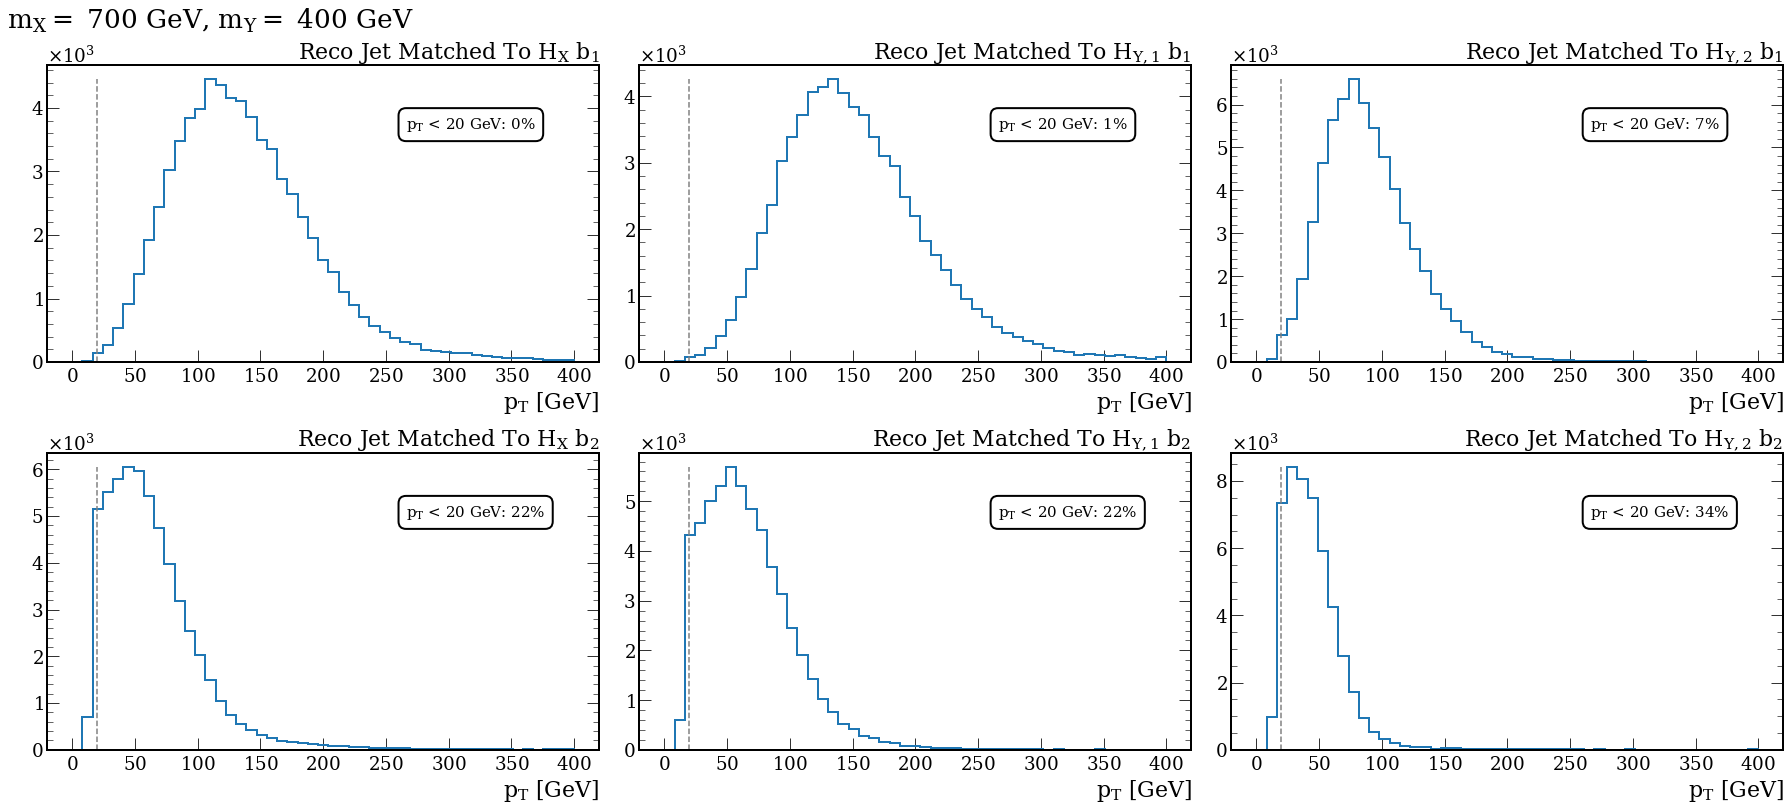

In [123]:
bins = np.linspace(0,400,50)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,12))

fig.suptitle(signal_tree.sample, y=0.95, x=0, ha='left')

for ax, parton in zip(axs.flatten(), prefix_6b):
    particle_type, higgs, quark = parton.split('_')
    particle_type = particle_type.upper()
    try: higgs = '$' + higgs[0] + '_{' + higgs[1] + ',' + higgs[2] + '}$'
    except: higgs = '$' + higgs[0] + '_' + higgs[1] + '$'
    quark = '$' + quark[0] + '_' + quark[1] + '$'

    parton_kin = signal_tree.get(parton + '_recojet_pt')
    fail_rate = ak.sum(parton_kin < 20)/len(parton_kin)*100
    n, edges, x = Hist(parton_kin, bins=bins, ax=ax, centers=True)
    ax.plot([20,20],[0,n.max()], '--', color='grey')
    ax.set_xlabel(r'$p_T$ [GeV]')
    ax.set_title(fr"Reco Jet Matched To {higgs} {quark}", loc='right')

    bbox_prop = dict(boxstyle="round,pad=0.5", ec="k", fc='white', lw=2)
    ax.text(0.65, 0.8,
    f"$p_T$ < 20 GeV: {int(fail_rate)}%", 
    ha="left", va="center", transform=ax.transAxes, size=15, bbox=bbox_prop)

plt.tight_layout(h_pad=0.5)
fig.savefig('plots/distributions/recojet_pt_nopreselections.pdf')

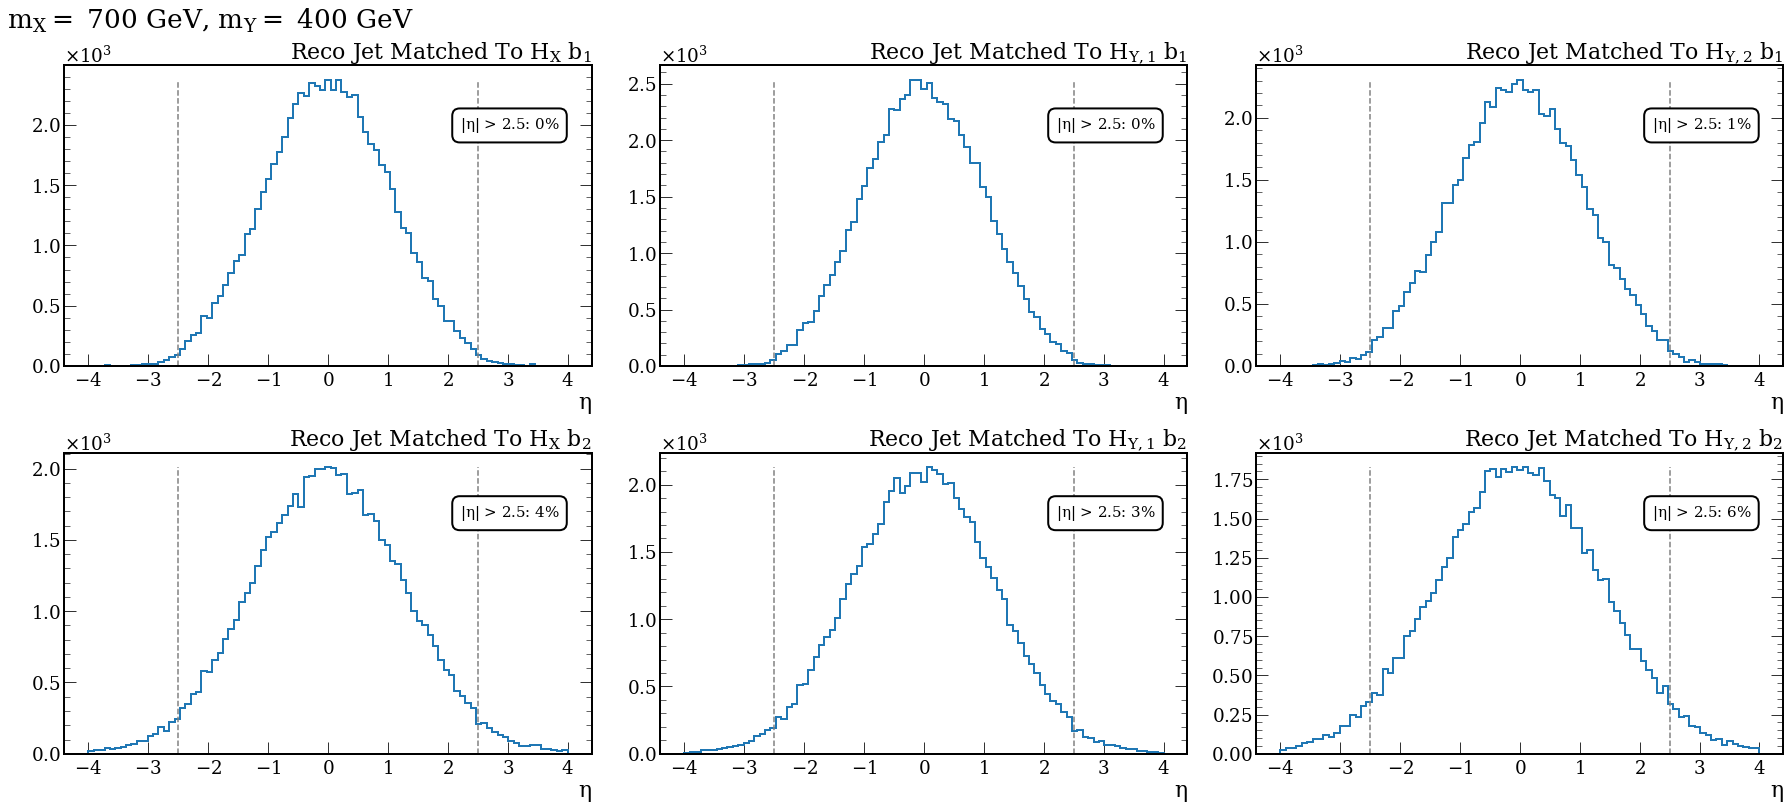

In [119]:
bins = np.linspace(-4,4,90)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,12))

fig.suptitle(signal_tree.sample, x=0, y=0.95, ha='left')

for ax, parton in zip(axs.flatten(), prefix_6b):
    particle_type, higgs, quark = parton.split('_')
    particle_type = particle_type.upper()
    try: higgs = '$' + higgs[0] + '_{' + higgs[1] + ',' + higgs[2] + '}$'
    except: higgs = '$' + higgs[0] + '_' + higgs[1] + '$'
    quark = '$' + quark[0] + '_' + quark[1] + '$'

    parton_kin = signal_tree.get(parton + '_eta')
    fail_rate = ak.sum(abs(parton_kin) > 2.5)/len(parton_kin)*100
    n, edges, x = Hist(parton_kin, bins=bins, ax=ax, centers=True)
    ax.plot([-2.5,-2.5],[0,n.max()], '--', color='grey')
    ax.plot([+2.5,+2.5],[0,n.max()], '--', color='grey')
    ax.set_xlabel(r'$\eta$')
    ax.set_title(fr"Reco Jet Matched To {higgs} {quark}", loc='right')
    
    fail_rate = n[abs(edges[:-1]) > 2.5].sum()/n.sum()*100

    bbox_prop = dict(boxstyle="round,pad=0.5", ec="k", fc='white', lw=2)
    ax.text(0.75, 0.8,
    f"|$\eta$| > 2.5: {int(fail_rate)}%", 
    ha="left", va="center", transform=ax.transAxes, size=15, bbox=bbox_prop)

plt.tight_layout(h_pad=0.5)
fig.savefig('plots/distributions/recojet_eta_nopreselections.pdf')

In [122]:
ak.sum(ak.sum(signal_tree.jet_pt > 20, axis=1) > 6)/len(signal_tree.jet_pt)

0.8408218785796105

TypeError: `bins` must be an integer, a string, or an array

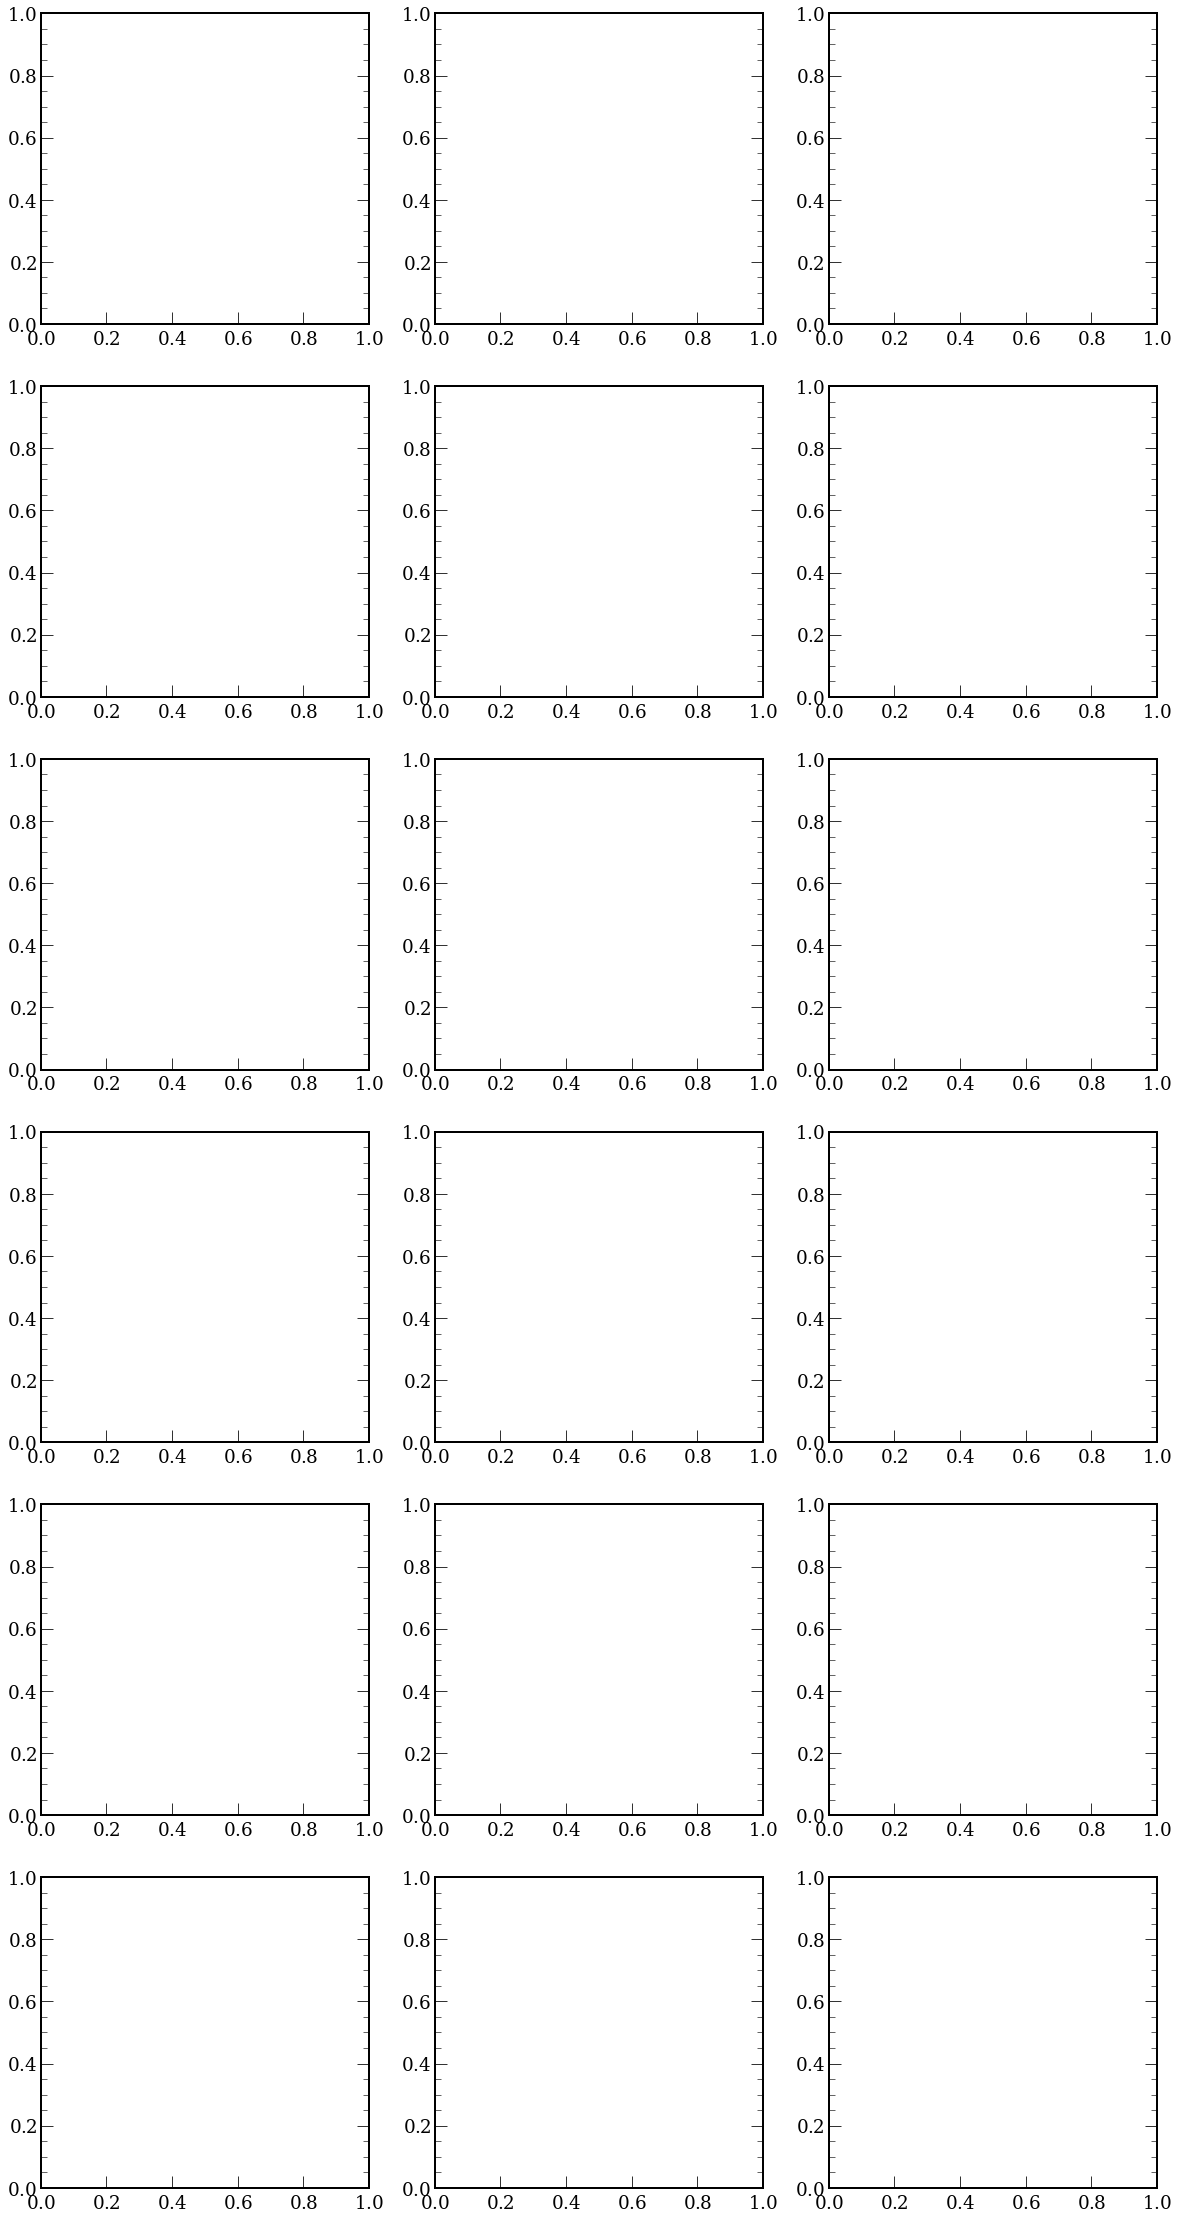

In [12]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20,40))

eta_bins = np.linspace(-4,4,100)
phi_bins = np.linspace(-np.pi, np.pi, 100)

gen_jet_pt = signal_tree.genjet_pt # gen jet pt
gen_jet_eta = signal_tree.genjet_eta # gen jet eta
gen_jet_phi = signal_tree.genjet_phi # gen jet phi
gen_jet_m = signal_tree.genjet_m # gen jet m
gen_jet_id = signal_tree.genjet_signalId # gen jet signal id
gen_jet_rid = signal_tree.genjet_recoIdx # gen-reco match id
for sig_jet in range(6):
    irow = sig_jet%6
    sig_jet_mask = gen_jet_id == sig_jet # signal jet mask
    sig_jet_rid = gen_jet_rid[sig_jet_mask] # signal jet reco id
    sig_jet_pt = gen_jet_pt[sig_jet_mask] # signal jet pt
    sig_jet_eta = gen_jet_eta[sig_jet_mask] # signal jet eta
    sig_jet_phi = gen_jet_phi[sig_jet_mask] # signal jet phi
    sig_jet_m = gen_jet_m[sig_jet_mask] # signal jet m
    n, b = np.histogram(ak.flatten(sig_jet_pt[sig_jet_rid > -1]).to_numpy(), bins=pt_bins)
    d, b = np.histogram(ak.flatten(sig_jet_pt).to_numpy(), bins=pt_bins)
    x = x_from_bins(pt_bins)
    eff = np.where(d != 0, n/d, 0)
    Hist(x, weights=eff, bins=pt_bins, fig=fig, ax=ax[irow, 0])
    n, b = np.histogram(ak.flatten(sig_jet_eta[sig_jet_rid > -1]).to_numpy(), bins=eta_bins)
    d, b = np.histogram(ak.flatten(sig_jet_eta).to_numpy(), bins=eta_bins)
    x = x_from_bins(eta_bins)
    eff = np.where(d != 0, n/d, 0)
    Hist(x, weights=eff, bins=eta_bins, fig=fig, ax=ax[irow, 1])
    n, b = np.histogram(ak.flatten(sig_jet_phi[sig_jet_rid > -1]).to_numpy(), bins=phi_bins)
    d, b = np.histogram(ak.flatten(sig_jet_phi).to_numpy(), bins=phi_bins)
    x = x_from_bins(phi_bins)
    eff = np.where(d != 0, n/d, 0)
    Hist(x, weights=eff, bins=phi_bins, fig=fig, ax=ax[irow, 2])


In [ ]:
event_mask = ak.sum(gen_jet_rid[gen_jet_id > -1] > -1, axis=1) == 6

In [ ]:
p4s = []

for sig_jet in range(6):
    sig_jet_mask = gen_jet_id == sig_jet # signal jet mask
    sig_jet_rid = gen_jet_rid[sig_jet_mask] # signal jet reco id

    sig_jet_pt = gen_jet_pt[sig_jet_mask] # signal jet pt
    sig_jet_eta = gen_jet_eta[sig_jet_mask] # signal jet eta
    sig_jet_phi = gen_jet_phi[sig_jet_mask] # signal jet phi
    sig_jet_m = gen_jet_m[sig_jet_mask] # signal jet m

    gen_jet_p4 = vector.obj(pt=sig_jet_pt[event_mask], eta=sig_jet_eta[event_mask], phi=sig_jet_phi[event_mask], m=sig_jet_m[event_mask])
    p4s.append(gen_jet_p4)

In [ ]:
min_pt_mask = (ak.min(gen_jet_pt[gen_jet_id > -1], axis=1) > 30)[event_mask]

In [ ]:
evt_p4 = p4s[0] + p4s[1] + p4s[2] + p4s[3] + p4s[4] + p4s[5]

In [ ]:
initialize_flag = True
for i,p4_1 in enumerate(p4s[:-1]):
    for p4_2 in p4s[i+1:]:
        deltaR = p4_1.deltaR(p4_2)
        if initialize_flag: 
            dR = deltaR.to_numpy()
            initialize_flag = False
        else: dR = np.column_stack((dR, deltaR.to_numpy()))
dR.sort(axis=1)

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

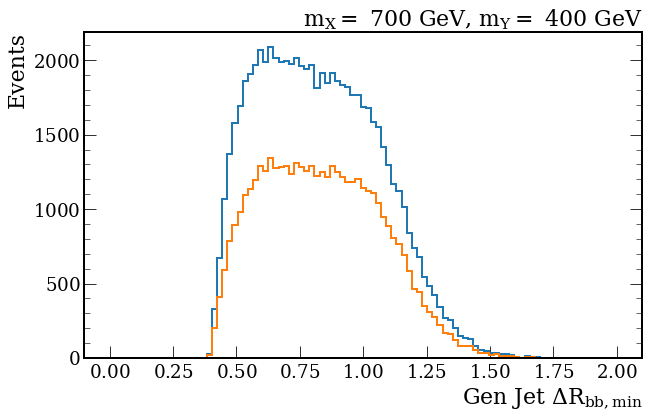

In [ ]:
fig, ax, n, e = Hist(dR[:,0], bins=np.linspace(0,2,100))
fig, ax, n, e = Hist(dR[:,0][min_pt_mask], bins=np.linspace(0,2,100), fig=fig, ax=ax)
ax.set_xlabel(r'Gen Jet $\Delta R_\mathrm{bb, min}$')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')


In [ ]:
HX_b1 = vector.obj(pt=signal_tree.gen_HX_b1_pt, eta=signal_tree.gen_HX_b1_eta, phi=signal_tree.gen_HX_b1_phi, m=signal_tree.gen_HX_b1_m)
HX_b2 = vector.obj(pt=signal_tree.gen_HX_b2_pt, eta=signal_tree.gen_HX_b2_eta, phi=signal_tree.gen_HX_b2_phi, m=signal_tree.gen_HX_b2_m)
H1_b1 = vector.obj(pt=signal_tree.gen_HY1_b1_pt, eta=signal_tree.gen_HY1_b1_eta, phi=signal_tree.gen_HY1_b1_phi, m=signal_tree.gen_HY1_b1_m)
H1_b2 = vector.obj(pt=signal_tree.gen_HY1_b2_pt, eta=signal_tree.gen_HY1_b2_eta, phi=signal_tree.gen_HY1_b2_phi, m=signal_tree.gen_HY1_b2_m)
H2_b1 = vector.obj(pt=signal_tree.gen_HY2_b1_pt, eta=signal_tree.gen_HY2_b1_eta, phi=signal_tree.gen_HY2_b1_phi, m=signal_tree.gen_HY2_b1_m)
H2_b2 = vector.obj(pt=signal_tree.gen_HY2_b2_pt, eta=signal_tree.gen_HY2_b2_eta, phi=signal_tree.gen_HY2_b2_phi, m=signal_tree.gen_HY2_b2_m)

In [ ]:
HX = HX_b1 + HX_b2
H1 = H1_b1 + H1_b2
H2 = H2_b1 + H2_b2

In [ ]:
Y = H1 + H2
X = H1 + H2 + HX

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

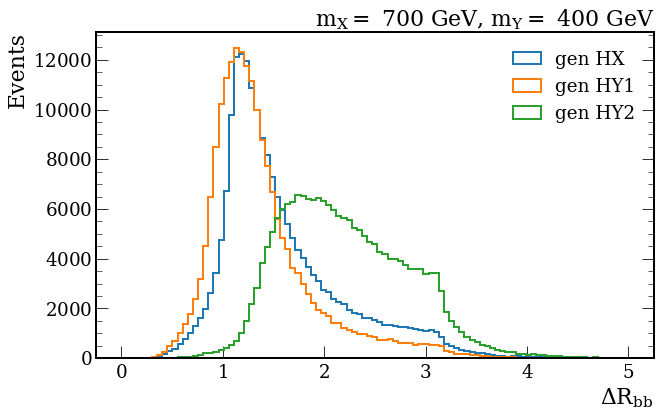

In [ ]:
fig, ax, n, edges = Hist(HX_b1.deltaR(HX_b2), bins=np.linspace(0,5,100), label='gen HX')
fig, ax, n, edges = Hist(H1_b1.deltaR(H1_b2), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HY1')
fig, ax, n, edges = Hist(H2_b1.deltaR(H2_b2), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HY2')
ax.set_xlabel(r'$\Delta R_\mathrm{bb}$')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')

In [ ]:
bins = np.linspace(0,5,100)

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

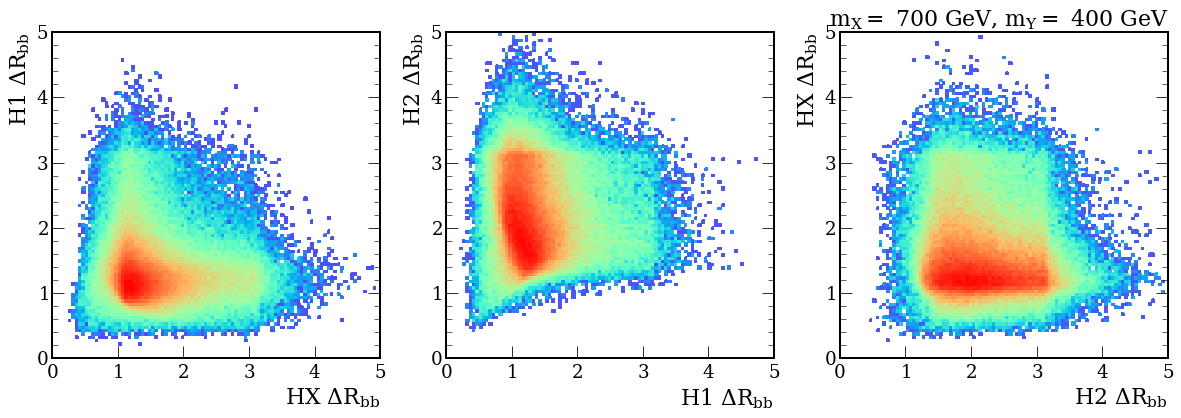

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

ax = axs[0]
n, xe, ye, im = Hist2d(x=HX_b1.deltaR(HX_b2), y=H1_b1.deltaR(H1_b2), bins=(bins,bins), ax=ax)
ax.set_xlabel('HX $\Delta R_\mathrm{bb}$')
ax.set_ylabel('H1 $\Delta R_\mathrm{bb}$')
ax = axs[1]
n, xe, ye, im = Hist2d(x=H1_b1.deltaR(H1_b2), y=H2_b1.deltaR(H2_b2), bins=(bins,bins), ax=ax)
ax.set_xlabel('H1 $\Delta R_\mathrm{bb}$')
ax.set_ylabel('H2 $\Delta R_\mathrm{bb}$')
ax = axs[2]
n, xe, ye, im = Hist2d(x=H2_b1.deltaR(H2_b2), y=HX_b1.deltaR(HX_b2), bins=(bins,bins), ax=ax)
ax.set_xlabel('H2 $\Delta R_\mathrm{bb}$')
ax.set_ylabel('HX $\Delta R_\mathrm{bb}$')
ax.set_title(signal_tree.sample, loc='right')

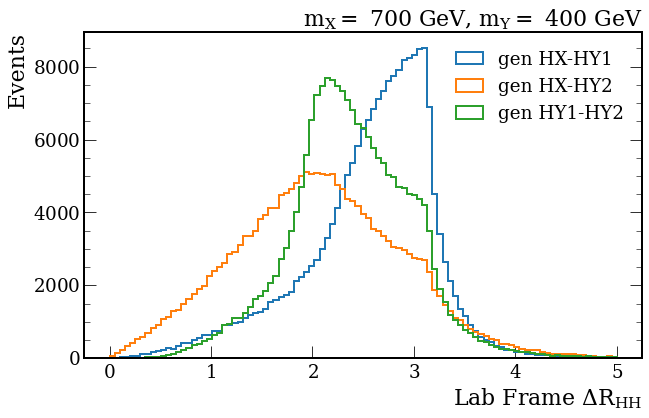

In [ ]:
fig, ax, n, edges = Hist(HX.deltaR(H1), bins=np.linspace(0,5,100), label='gen HX-HY1')
fig, ax, n, edges = Hist(HX.deltaR(H2), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HX-HY2')
fig, ax, n, edges = Hist(H1.deltaR(H2), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HY1-HY2')
ax.set_xlabel(r'Lab Frame $\Delta R_\mathrm{HH}$')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')

fig.savefig('plots/distributions/DR_3H_gen.pdf')

Text(0, 1, 'H2-HX $\\Delta R$')

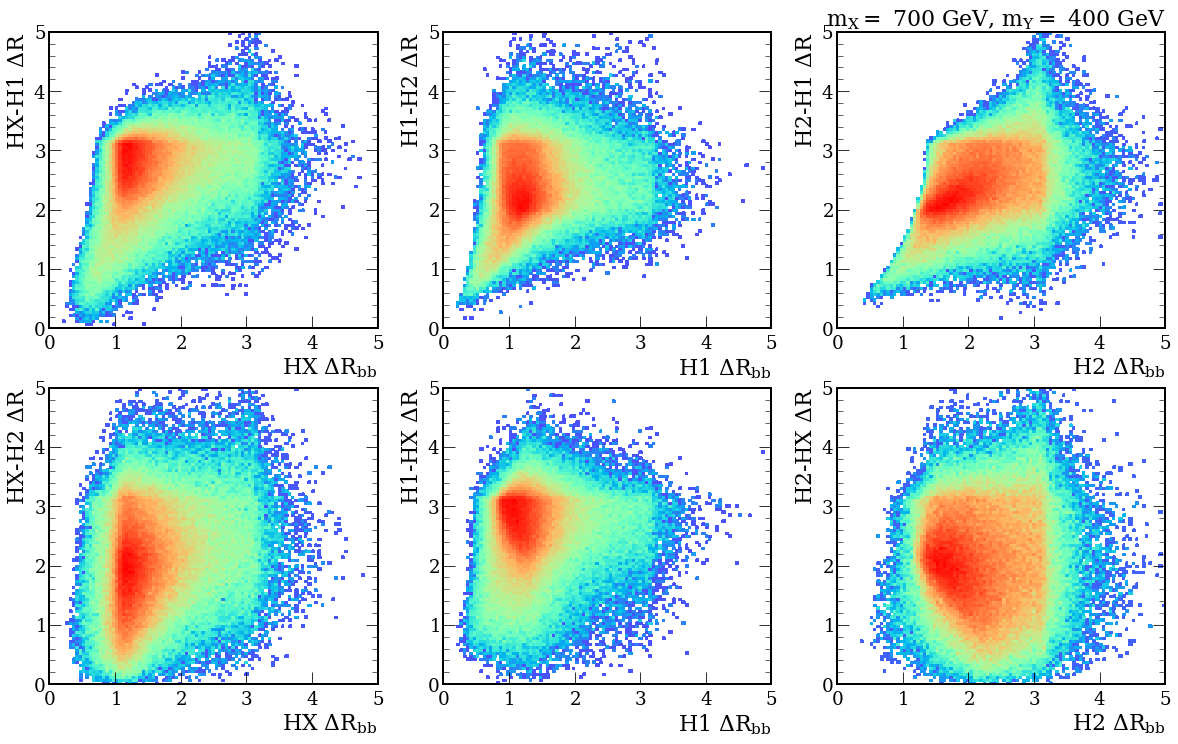

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

ax = axs[0][0]
n, xe, ye, im = Hist2d(x=HX_b1.deltaR(HX_b2), y=HX.deltaR(H1), bins=(bins,bins), ax=ax)
ax.set_xlabel('HX $\Delta R_\mathrm{bb}$')
ax.set_ylabel('HX-H1 $\Delta R$')
ax = axs[1][0]
n, xe, ye, im = Hist2d(x=HX_b1.deltaR(HX_b2), y=HX.deltaR(H2), bins=(bins,bins), ax=ax)
ax.set_xlabel('HX $\Delta R_\mathrm{bb}$')
ax.set_ylabel('HX-H2 $\Delta R$')
ax = axs[0][1]
n, xe, ye, im = Hist2d(x=H1_b1.deltaR(H1_b2), y=H1.deltaR(H2), bins=(bins,bins), ax=ax)
ax.set_xlabel('H1 $\Delta R_\mathrm{bb}$')
ax.set_ylabel('H1-H2 $\Delta R$')
ax = axs[1][1]
n, xe, ye, im = Hist2d(x=H1_b1.deltaR(H1_b2), y=H1.deltaR(HX), bins=(bins,bins), ax=ax)
ax.set_xlabel('H1 $\Delta R_\mathrm{bb}$')
ax.set_ylabel('H1-HX $\Delta R$')
ax = axs[0][2]
n, xe, ye, im = Hist2d(x=H2_b1.deltaR(H2_b2), y=H2.deltaR(H1), bins=(bins,bins), ax=ax)
ax.set_xlabel('H2 $\Delta R_\mathrm{bb}$')
ax.set_ylabel('H2-H1 $\Delta R$')
ax.set_title(signal_tree.sample, loc='right')
ax = axs[1][2]
n, xe, ye, im = Hist2d(x=H2_b1.deltaR(H2_b2), y=H2.deltaR(HX), bins=(bins,bins), ax=ax)
ax.set_xlabel('H2 $\Delta R_\mathrm{bb}$')
ax.set_ylabel('H2-HX $\Delta R$')

In [ ]:
HX_b = HX.boost_p4(X)
H1_b = H1.boost_p4(X)
H2_b = H2.boost_p4(X)

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

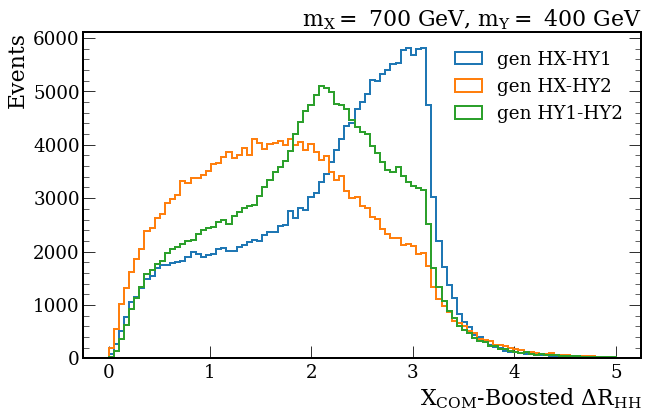

In [ ]:
fig, ax, n, edges = Hist(HX_b.deltaR(H1_b), bins=np.linspace(0,5,100), label='gen HX-HY1')
fig, ax, n, edges = Hist(HX_b.deltaR(H2_b), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HX-HY2')
fig, ax, n, edges = Hist(H1_b.deltaR(H2_b), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HY1-HY2')
ax.set_xlabel(r'X$_\mathrm{COM}$-Boosted $\Delta R_\mathrm{HH}$')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')

# fig.savefig('plots/distributions/DR_3H_gen.pdf')

In [ ]:
HX_b = HX.boost_p4(Y)
H1_b = H1.boost_p4(Y)
H2_b = H2.boost_p4(Y)

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

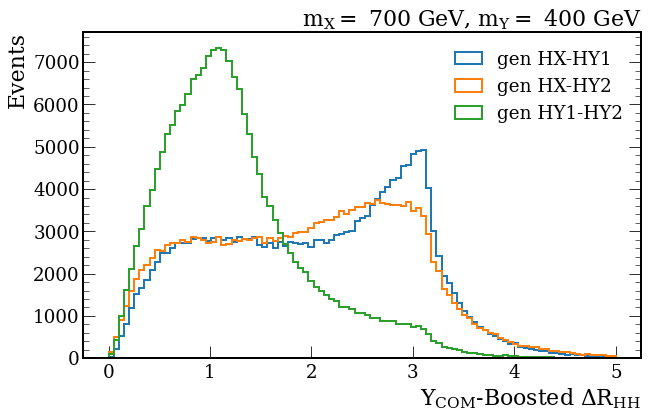

In [ ]:
fig, ax, n, edges = Hist(HX_b.deltaR(H1_b), bins=np.linspace(0,5,100), label='gen HX-HY1')
fig, ax, n, edges = Hist(HX_b.deltaR(H2_b), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HX-HY2')
fig, ax, n, edges = Hist(H1_b.deltaR(H2_b), bins=np.linspace(0,5,100), fig=fig, ax=ax, label='gen HY1-HY2')
ax.set_xlabel(r'Y$_\mathrm{COM}$-Boosted $\Delta R_\mathrm{HH}$')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')

# fig.savefig('plots/distributions/DR_3H_gen.pdf')

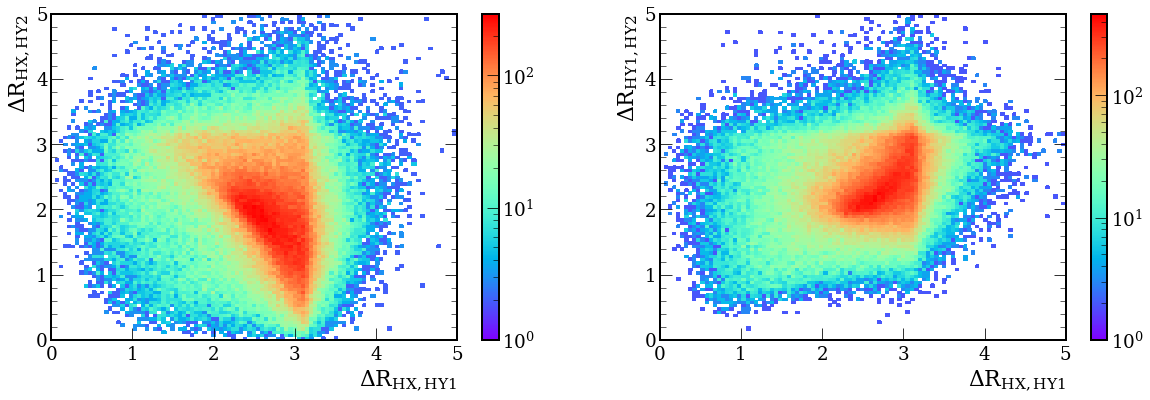

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax = axs[0]
n, xe, ye, im = Hist2d(ax=ax, x=HX.deltaR(H1), y=HX.deltaR(H2), bins=(np.linspace(0,5,100),np.linspace(0,5,100)))
ax.set_xlabel(r'$\Delta R_{HX, HY1}$')
ax.set_ylabel(r'$\Delta R_{HX, HY2}$')
fig.colorbar(im, ax=ax)

ax = axs[1]
n, xe, ye, im = Hist2d(ax=ax, x=HX.deltaR(H1), y=H1.deltaR(H2), bins=(np.linspace(0,5,100),np.linspace(0,5,100)))
ax.set_xlabel(r'$\Delta R_{HX, HY1}$')
ax.set_ylabel(r'$\Delta R_{HY1, HY2}$')
fig.colorbar(im, ax=ax)

In [ ]:
X = HX_b1 + HX_b2 + H1_b1 + H1_b2 + H2_b1 + H2_b2

In [ ]:
b_p4s = [HX_b1, HX_b2, H1_b1, H1_b2, H2_b1, H2_b2]

In [ ]:
initialize_flag = True
for i,p4_1 in enumerate(b_p4s[:-1]):
    for p4_2 in b_p4s[i+1:]:
        deltaR = p4_1.deltaR(p4_2)
        if initialize_flag: 
            gen_dR = deltaR.to_numpy()
            initialize_flag = False
        else: gen_dR = np.column_stack((gen_dR, deltaR.to_numpy()))

In [ ]:
min_dR_jet = np.argsort(gen_dR, axis=1)
gen_dR.sort(axis=1)

In [ ]:
min_dR_jet[:,0][gen_dR[:,0] < 0.5]

array([4, 9, 8, ..., 7, 8, 2])

In [ ]:
pt_min = 30

pt_mask = ((signal_tree.gen_HX_b1_pt > pt_min) &
           (signal_tree.gen_HX_b2_pt > pt_min) &
           (signal_tree.gen_HY1_b1_pt > pt_min) &
           (signal_tree.gen_HY1_b2_pt > pt_min) &
           (signal_tree.gen_HY2_b1_pt > pt_min) &
           (signal_tree.gen_HY2_b2_pt > pt_min))

Setting scale=1. Was this intentional?


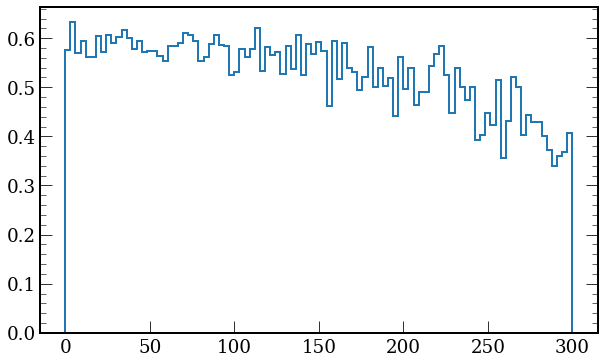

In [ ]:
num, b = np.histogram(signal_tree.gen_X_pt.to_numpy()[event_mask & (gen_dR[:,0] > 0.8)], bins=pt_bins)
den, b = np.histogram(signal_tree.gen_X_pt.to_numpy()[event_mask], bins=pt_bins)

eff = np.where(den!=0, num/den, 0)
fig, ax, n, edges = Hist(x_from_bins(pt_bins), weights=eff, bins=pt_bins)

Setting scale=1. Was this intentional?
Setting scale=1. Was this intentional?


Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

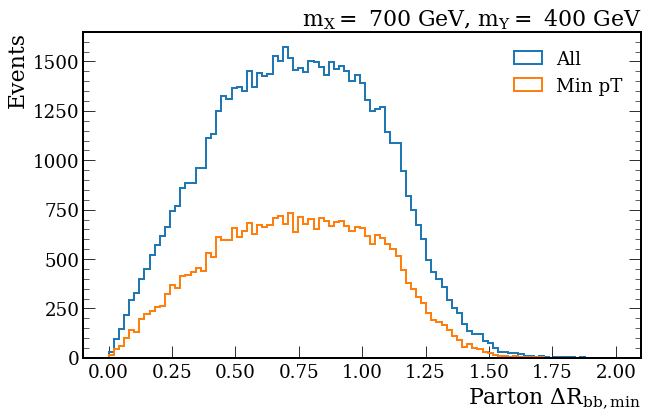

In [ ]:
fig, ax, n, edges = Hist(gen_dR[:,0], bins=np.linspace(0,2,100), label='All')
fig, ax, n, edges = Hist(gen_dR[:,0][pt_mask], bins=np.linspace(0,2,100), fig=fig, ax=ax, label='Min pT')
ax.set_xlabel(r'Parton $\Delta R_\mathrm{bb, min}$')
ax.set_ylabel('Events')
ax.set_title(signal_tree.sample, loc='right')

Setting scale=1. Was this intentional?


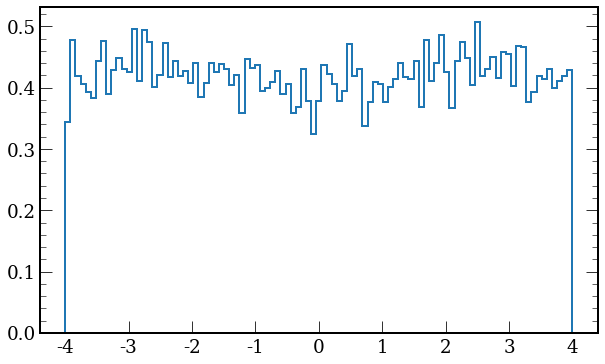

In [ ]:
num, b = np.histogram(ak.flatten(evt_p4.eta).to_numpy(), bins=eta_bins)
den, b = np.histogram(signal_tree.gen_X_eta.to_numpy(), bins=eta_bins)

eff = np.where(den!=0, num/den, 0)
fig, ax, n, edges = Hist(x_from_bins(eta_bins), weights=eff, bins=eta_bins)

Setting scale=1. Was this intentional?


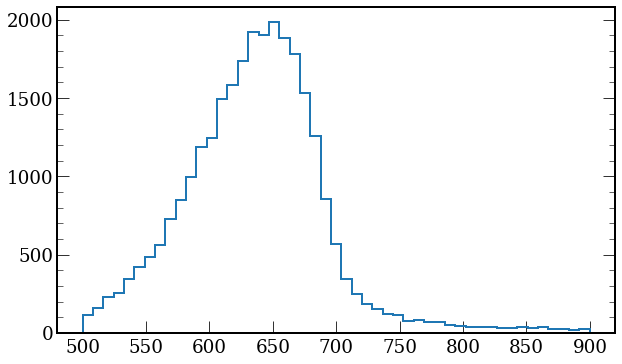

In [ ]:
fig, ax, n, edges = Hist(ak.flatten(evt_p4.m), bins=np.linspace(500,900))

Setting scale=1. Was this intentional?


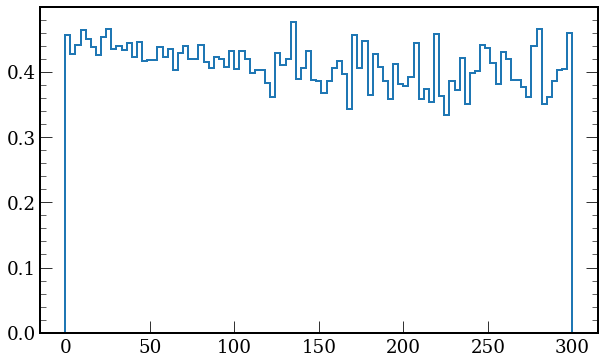

In [ ]:
num, b = np.histogram(signal_tree.gen_X_pt.to_numpy()[event_mask], bins=pt_bins)
den, b = np.histogram(signal_tree.gen_X_pt.to_numpy(), bins=pt_bins)

eff = np.where(den!=0, num/den, 0)
fig, ax, n, edges = Hist(x_from_bins(pt_bins), weights=eff, bins=pt_bins)

Setting scale=1. Was this intentional?


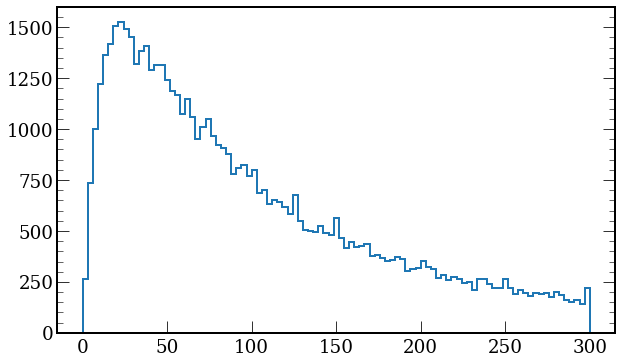

In [ ]:
fig, ax, n, edges = Hist(signal_tree.gen_X_pt, bins=pt_bins)